In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Missing Values Imputation

In [2]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X = [[np.nan, 5, np.nan], [2, 4, 10], [3, np.nan, 5]]
imputer.fit_transform(X)

array([[ 2.5,  5. ,  7.5],
       [ 2. ,  4. , 10. ],
       [ 3. ,  4.5,  5. ]])

In [3]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10)

X = [[1, 2], [2, 4], [4, 8], [np.nan, 3], [5, np.nan]]
imputer.fit_transform(X)

array([[ 1.        ,  2.        ],
       [ 2.        ,  4.        ],
       [ 4.        ,  8.        ],
       [ 1.50000846,  3.        ],
       [ 5.        , 10.00000145]])

In [4]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)

X = [[1, 2, np.nan], [3, 2, 3], [6, np.nan, 5], [7, 8, 10]]
imputer.fit_transform(X)

array([[ 1.,  2.,  4.],
       [ 3.,  2.,  3.],
       [ 6.,  5.,  5.],
       [ 7.,  8., 10.]])

Encoding Categorical Data

In [1]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

X = [['LowIncome', 'BA'], ['HighIncome', 'PhD'], ['MediumIncome', 'BA']]
encoder.fit_transform(X)

array([[1., 0.],
       [0., 1.],
       [2., 0.]])

In [3]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

X = [['LowIncome', 'BA'], ['HighIncome', 'PhD'], ['MediumIncome', 'BA']]
encoder.fit_transform(X).toarray()

array([[0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.]])

Power Transformation

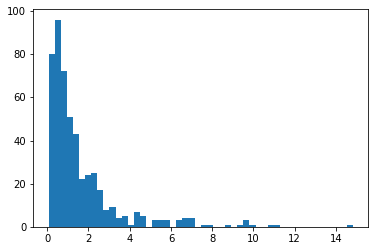

In [12]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer('box-cox')

X = np.random.RandomState(0).lognormal(size=500)
plt.hist(X, bins=50)
plt.savefig('figures/before_power_transform.pdf')

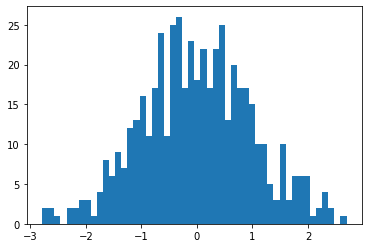

In [13]:
X_new = pt.fit_transform(X.reshape(-1, 1))
plt.hist(X_new, bins=50)
plt.savefig('figures/after_power_transform.pdf')

Discretization

In [10]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=3, strategy='uniform', encode='ordinal')

X = [[-1, 2, 3], [0.5, 6, 10], [0, 1, 8], [0.2, 3, 15]]
discretizer.fit_transform(X)

array([[0., 0., 0.],
       [2., 2., 1.],
       [2., 0., 1.],
       [2., 1., 2.]])

In [11]:
discretizer.bin_edges_

array([array([-1. , -0.5,  0. ,  0.5]),
       array([1.        , 2.66666667, 4.33333333, 6.        ]),
       array([ 3.,  7., 11., 15.])], dtype=object)

Feature Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = [[-1, 2, 3], [0.5, 6, 10], [0, 1, 8]]
scaler.fit_transform(X)

array([[0.        , 0.2       , 0.        ],
       [1.        , 1.        , 1.        ],
       [0.66666667, 0.        , 0.71428571]])

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = [[-1, 2, 3], [0.5, 6, 10], [0, 1, 8]]
scaler.fit_transform(X)

array([[-1.33630621, -0.46291005, -1.35873244],
       [ 1.06904497,  1.38873015,  1.01904933],
       [ 0.26726124, -0.9258201 ,  0.33968311]])

In [9]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X = [[-1, 2, 3], [0.5, 6, 10], [0, 1, 8]]
scaler.fit_transform(X)

array([[-1.33333333,  0.        , -1.42857143],
       [ 0.66666667,  1.6       ,  0.57142857],
       [ 0.        , -0.4       ,  0.        ]])